<a href="https://colab.research.google.com/github/ShaliniVaibhav/ML/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<Axes: xlabel='Month'>

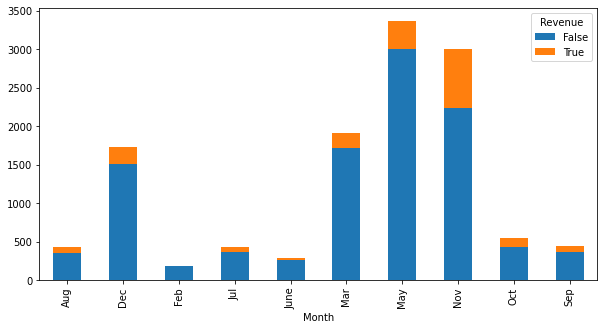

In [4]:
df.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

<Axes: xlabel='Weekend'>

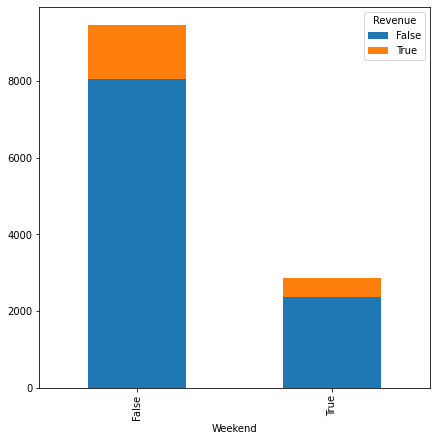

In [5]:
df.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

<Axes: ylabel='VisitorType'>

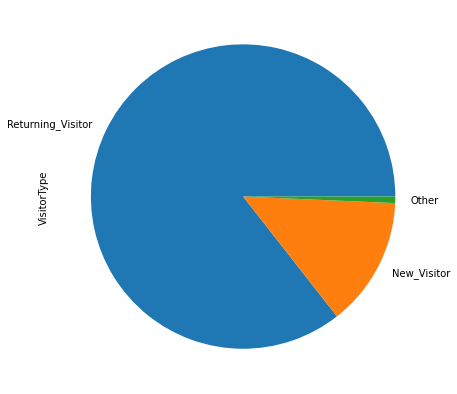

In [6]:
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

<Axes: >

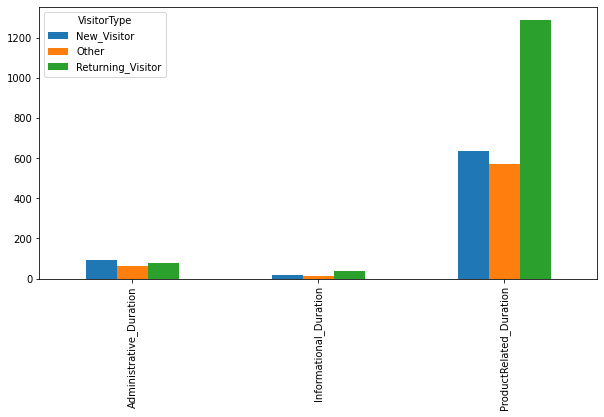

In [8]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

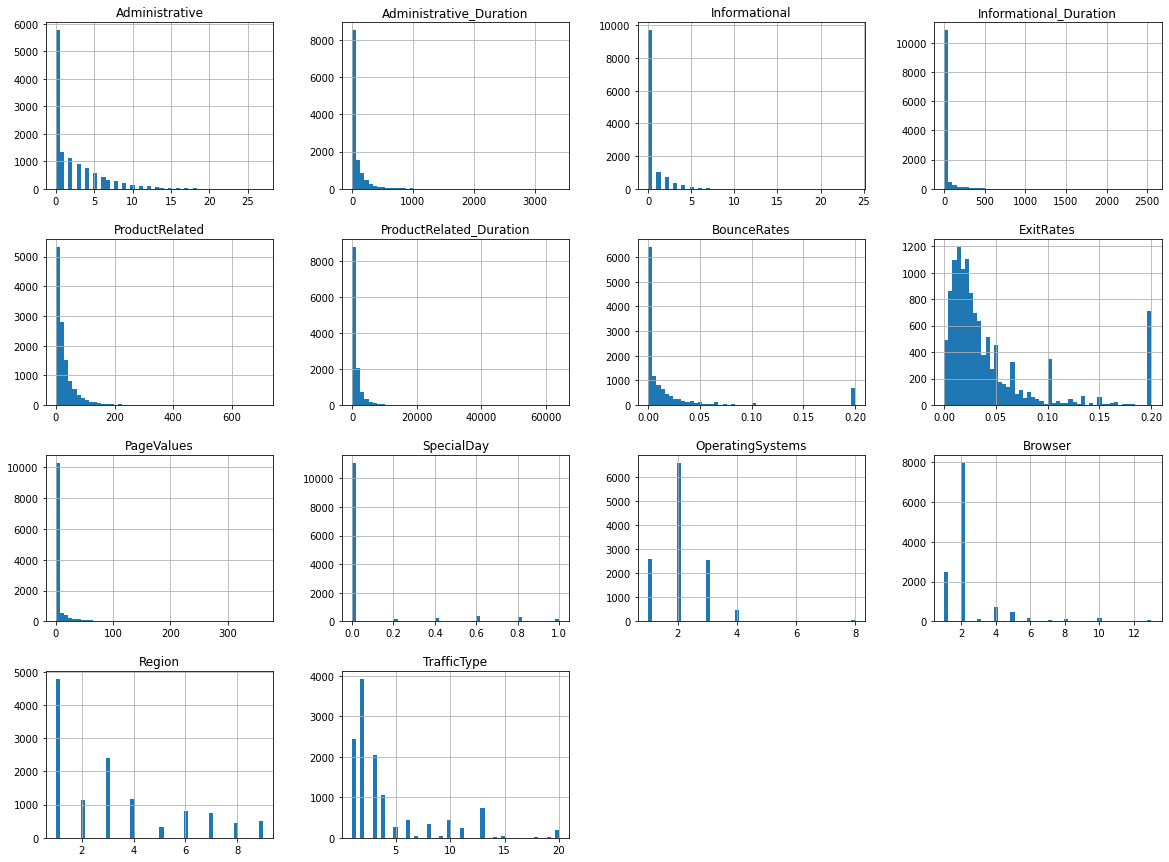

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

<Axes: >

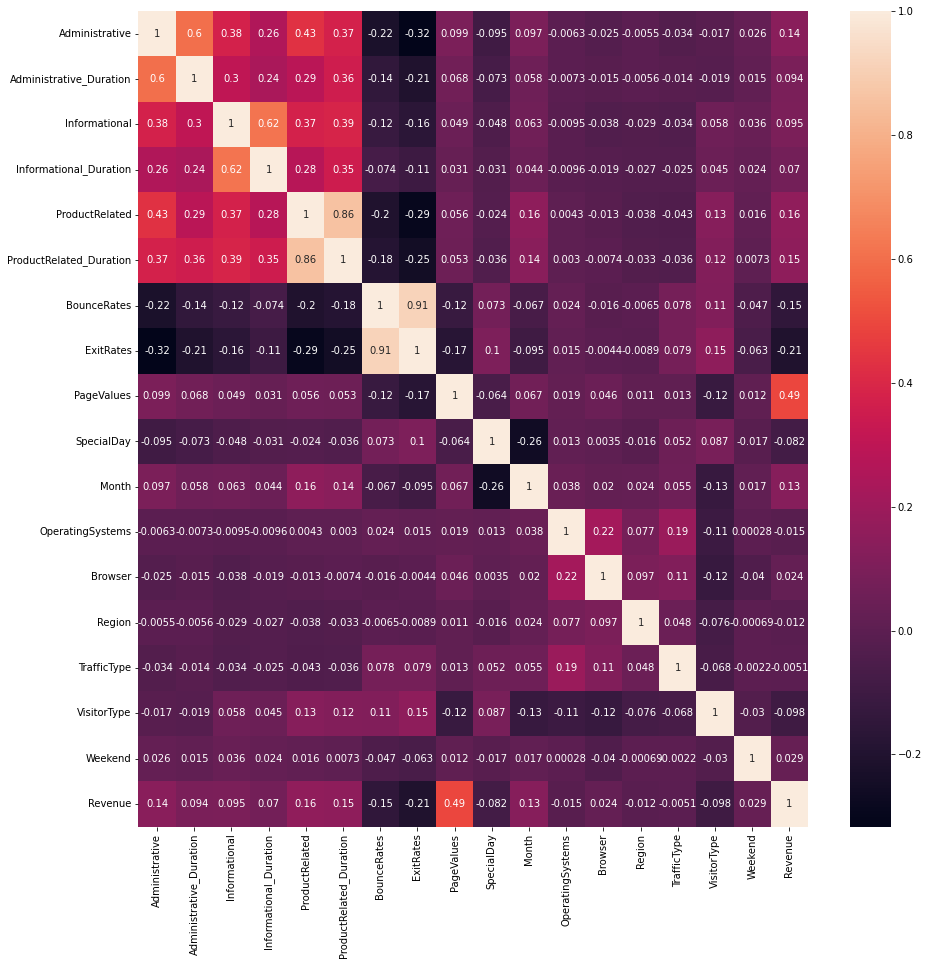

In [11]:
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [12]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(df.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(df.drop('Revenue', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) 
df_feat.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3166
           1       0.72      0.32      0.44       533

    accuracy                           0.88      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



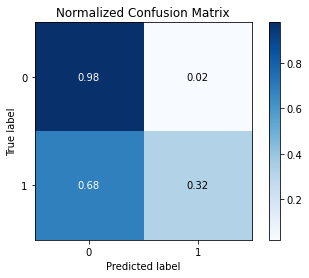

In [14]:
from sklearn.model_selection import train_test_split 
!pip install scikit-plot
import scikitplot as skplt
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 17) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix 
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
print(classification_report(y_test, pred)) 

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.848


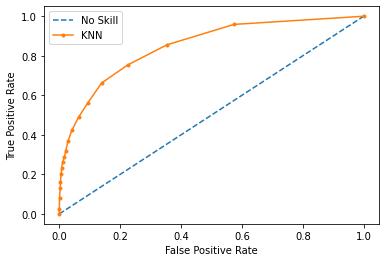

In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot




ns_probs = [0 for _ in range(len(y_test))]
lr_probs = knn.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
y_pred1 = (knn.predict_proba(X_test)[:,1] >= 0.15).astype(int) # set threshold as 0.3
recall_score(y_test, y_pred1)

0.7542213883677298

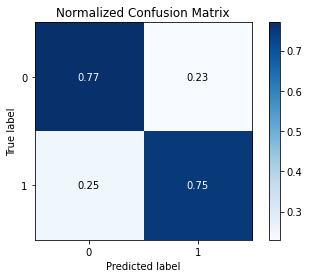

In [17]:
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,y_pred1, normalize=True)